In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

595

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hermanus
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | price
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | thompson
Processing Record 6 of Set 1 | tiznit
Processing Record 7 of Set 1 | inirida
Processing Record 8 of Set 1 | clyde river
Processing Record 9 of Set 1 | vardo
Processing Record 10 of Set 1 | port hardy
Processing Record 11 of Set 1 | solnechnyy
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | rikitea
Processing Record 14 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 15 of Set 1 | vanavara
Processing Record 16 of Set 1 | isangel
Processing Record 17 of Set 1 | hobart
Processing Record 18 of Set 1 | vigrestad
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | ambanja
Processing Record 21 of Set 1 | tuktoyaktuk
Processing Record 22 of Set 1 | abiy adi
City

Processing Record 36 of Set 4 | manaure
Processing Record 37 of Set 4 | richards bay
Processing Record 38 of Set 4 | bayji
Processing Record 39 of Set 4 | salalah
Processing Record 40 of Set 4 | dubbo
Processing Record 41 of Set 4 | veriora
Processing Record 42 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 43 of Set 4 | bardiyah
Processing Record 44 of Set 4 | rincon
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | yulara
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | bilma
Processing Record 49 of Set 4 | tiksi
Processing Record 50 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 1 of Set 5 | qaanaaq
Processing Record 2 of Set 5 | jumla
Processing Record 3 of Set 5 | karachi
Processing Record 4 of Set 5 | touros
Processing Record 5 of Set 5 | poum
Processing Record 6 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 7 of Set 5 | thoen
Processing Record 8 of Set 5 |

Processing Record 28 of Set 8 | ribeira do pombal
Processing Record 29 of Set 8 | teahupoo
Processing Record 30 of Set 8 | russell
Processing Record 31 of Set 8 | grand gaube
Processing Record 32 of Set 8 | gamboma
Processing Record 33 of Set 8 | axim
Processing Record 34 of Set 8 | khandyga
Processing Record 35 of Set 8 | carnarvon
Processing Record 36 of Set 8 | kununurra
Processing Record 37 of Set 8 | inhambane
Processing Record 38 of Set 8 | carutapera
Processing Record 39 of Set 8 | bambous virieux
Processing Record 40 of Set 8 | north platte
Processing Record 41 of Set 8 | san lorenzo
Processing Record 42 of Set 8 | morwell
Processing Record 43 of Set 8 | matamoros
Processing Record 44 of Set 8 | hasaki
Processing Record 45 of Set 8 | awjilah
Processing Record 46 of Set 8 | sao joao da barra
Processing Record 47 of Set 8 | znamenskoye
Processing Record 48 of Set 8 | necochea
Processing Record 49 of Set 8 | nelson bay
Processing Record 50 of Set 8 | kamaishi
Processing Record 1 o

Processing Record 21 of Set 12 | calabozo
Processing Record 22 of Set 12 | meyungs
City not found. Skipping...
Processing Record 23 of Set 12 | gubkinskiy
Processing Record 24 of Set 12 | belyy yar
Processing Record 25 of Set 12 | amapa
Processing Record 26 of Set 12 | bushehr
Processing Record 27 of Set 12 | gazanjyk
Processing Record 28 of Set 12 | olinda
Processing Record 29 of Set 12 | gat
Processing Record 30 of Set 12 | bolshiye klyuchishchi
City not found. Skipping...
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | bacolod
Processing Record 33 of Set 12 | ozernovskiy
Processing Record 34 of Set 12 | gallup
Processing Record 35 of Set 12 | dudinka
Processing Record 36 of Set 12 | saint-pierre
Processing Record 37 of Set 12 | sambava
Processing Record 38 of Set 12 | marzuq
Processing Record 39 of Set 12 | kohlu
Processing Record 40 of Set 12 | anzhero-sudzhensk
Processing Record 41 of Set 12 | tonk
Processing Record 42 of Set 12 | gunjur
Processing Record 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hermanus,-34.4187,19.2345,54.81,74,0,21.07,ZA,2021-09-17 20:29:30
1,Punta Arenas,-53.1500,-70.9167,39.99,78,96,2.42,CL,2021-09-17 20:29:38
2,Price,39.5994,-110.8107,83.12,11,0,10.71,US,2021-09-17 20:35:04
3,Butaritari,3.0707,172.7902,81.34,75,63,10.76,KI,2021-09-17 20:29:36
4,Thompson,55.7435,-97.8558,50.14,49,100,7.47,CA,2021-09-17 20:30:09
5,Tiznit,29.5833,-9.5000,65.77,80,26,3.96,MA,2021-09-17 20:35:05
6,Inirida,3.8653,-67.9239,81.21,79,89,3.31,CO,2021-09-17 20:35:05
7,Clyde River,70.4692,-68.5914,31.21,66,91,0.45,CA,2021-09-17 20:30:37
8,Vardo,70.3705,31.1107,45.10,73,100,12.91,NO,2021-09-17 20:31:10
9,Port Hardy,50.6996,-127.4199,50.18,100,90,16.11,CA,2021-09-17 20:31:25


In [11]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ozinki,RU,2021-09-16 21:07:33,51.1786,49.6769,45.12,80,40,10.40
1,Mount Gambier,AU,2021-09-16 21:07:33,-37.8333,140.7667,56.52,47,96,18.10
2,Khatanga,RU,2021-09-16 21:07:33,71.9667,102.5000,32.29,85,100,1.74
3,Inta,RU,2021-09-16 21:07:34,66.0317,60.1659,37.78,81,95,13.76
4,Hobart,AU,2021-09-16 21:07:34,-42.8794,147.3294,44.11,94,20,3.00
...,...,...,...,...,...,...,...,...,...
555,Sambava,MG,2021-09-16 21:10:07,-14.2667,50.1667,70.20,88,47,7.23
556,Goderich,CA,2021-09-16 21:10:07,43.7501,-81.7165,76.03,56,0,4.61
557,Aykhal,RU,2021-09-16 21:10:08,66.0000,111.5000,32.41,85,40,9.46
558,Waipawa,NZ,2021-09-16 21:10:08,-41.4122,175.5153,44.02,65,100,17.52


In [12]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [13]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

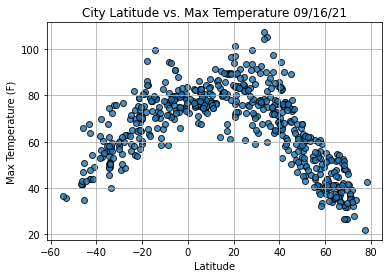

In [14]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

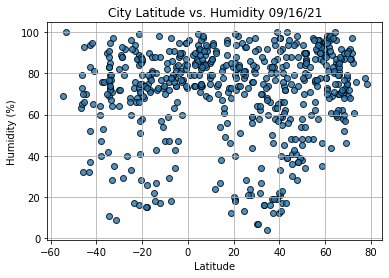

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

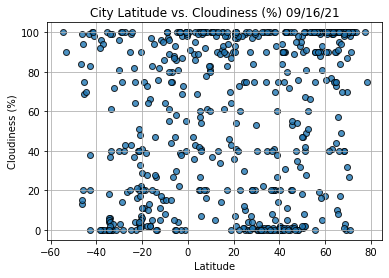

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

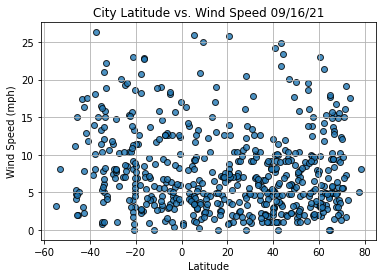

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [20]:
index13 = city_data_df.loc[13]
index13

City                    Upernavik
Country                        GL
Date          2021-09-16 21:07:37
Lat                       72.7868
Lng                      -56.1549
Max Temp                    27.79
Humidity                       61
Cloudiness                    100
Wind Speed                    4.0
Name: 13, dtype: object

In [21]:
city_data_df["Lat"] >= 0

0       True
1      False
2       True
3       True
4      False
       ...  
555    False
556     True
557     True
558    False
559     True
Name: Lat, Length: 560, dtype: bool

In [22]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ozinki,RU,2021-09-16 21:07:33,51.1786,49.6769,45.12,80,40,10.40
2,Khatanga,RU,2021-09-16 21:07:33,71.9667,102.5000,32.29,85,100,1.74
3,Inta,RU,2021-09-16 21:07:34,66.0317,60.1659,37.78,81,95,13.76
5,Kudahuvadhoo,MV,2021-09-16 21:07:34,2.6708,72.8944,82.85,74,89,7.96
8,Ulaangom,MN,2021-09-16 21:07:35,49.9811,92.0667,53.29,38,98,3.29


In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

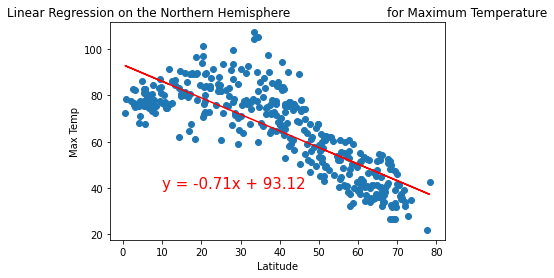

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

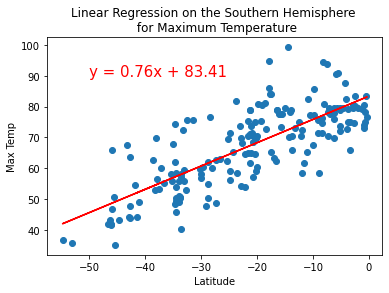

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

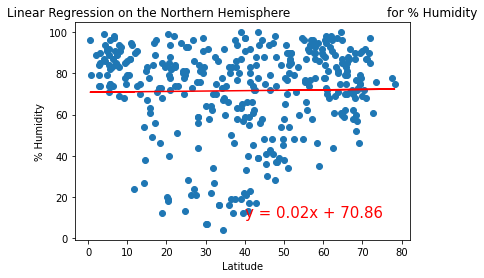

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

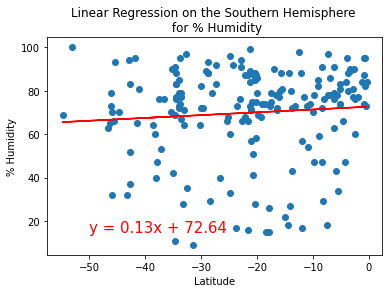

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

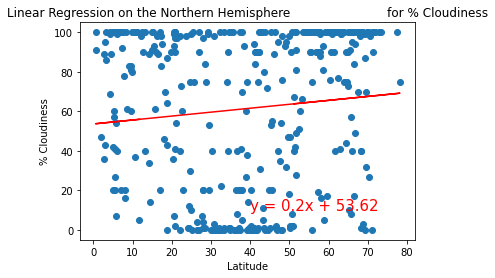

In [30]:
# Skill Drill
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

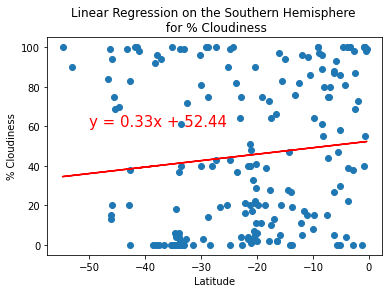

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

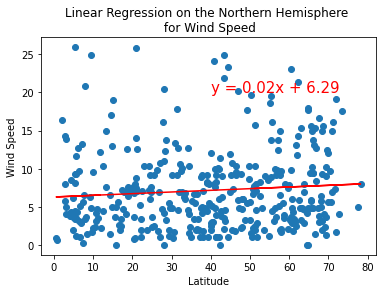

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,20))

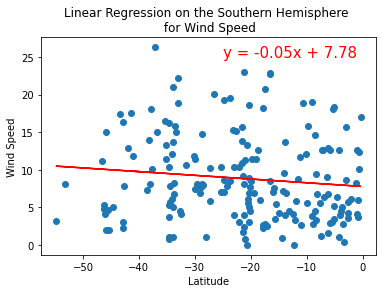

In [42]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-25,25))